In [25]:
from sklearn.metrics import f1_score
import numpy as np 
import pandas as pd
import glob
import matplotlib.pyplot as plt

## Learning Curve


In [3]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [20]:
files = glob.glob('run*.csv')
files.sort()
files

['run-sgd3_head1-tag-Loss_train.csv',
 'run-v3_hard_sel-tag-Loss_train.csv',
 'run-v3_hard_sel_10-tag-Loss_train.csv',
 'run-v4_mhsa_test-tag-Loss_train.csv',
 'run-whole_attention_whole_attention_resnet_-tag-Loss_train.csv',
 'run-whole_attention_whole_attention_v1_-tag-Loss_train.csv']

In [21]:
names = ["regional soft attention (head 1)", 
         "regional hard attention (select 5)",
         "regional hard attention (select 10)",
         "regional soft attention (head 8)",
         "whole soft attention (resnet encoder)",
         "whole soft attention (mobile net encoder)"]

In [38]:
df = pd.read_csv(files[5])
df.head()

,Wall time,Step,Value
0,1.614378e+09,43,1.466368
1,1.614378e+09,46,1.483541
2,1.614378e+09,95,1.260694
3,1.614378e+09,168,1.113266
4,1.614378e+09,230,1.076586


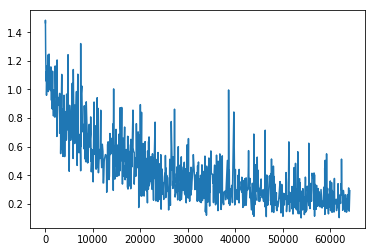

In [39]:
plt.plot(df['Step'],df['Value'])

In [ ]:
def plot_training(data_files,names,smooth_weight=0.85,ylim=None):
    losses = []
    losses_smoothed = []
    for data_file in data_files:
        df = pd.read_csv(data_file)
        loss = np.arry(df['Value'])
        losses.append(loss)

        loss_smoothed = smooth(loss, loss_smooth_weight)

        losses_smoothed.append(loss_smoothed)

    plt.figure()

    for (loss,loss_smoothed,name) in zip(losses,losses_smoothed,names):
        p = plt.plot(np.arange(len(loss)),loss,alpha=0.2,linestyle=line_type_dic[name])
        plt.plot(np.arange(len(loss_smoothed)),loss_smoothed,label=name,c=p[0].get_color(),linestyle=line_type_dic[name],linewidth=line_width_dic[name])
    plt.legend()
    if ylim:
        plt.ylim(ylim)
    plt.title('Loss vs episode')
    plt.xlabel("episode (after training start)")
    plt.ylabel("loss")
    plt.savefig('./figures/loss.png',dpi=300,bbox_inches='tight')

    plt.figure()


## F1 Score

In [ ]:
def ComputeClsAcc(target, pred):
    """
    target - target array, (N, cls)
    pred - prediction array (N, cls)
    """
    f1_macro = []
    f1_micro = []
    for cls in range(target.shape[1]):
        target_ = target[:, cls]
        pred_ = pred[:, cls]
        f1_macro.append(f1_score(target_, pred_, average='macro'))
        f1_micro.append(f1_score(target_, pred_, average='micro'))
    f1_macro = np.array(f1_macro)
    f1_micro = np.array(f1_micro)

    return f1_macro, f1_micro